In [1]:
from numpy import loadtxt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd

In [2]:
# 예제 4.1 당뇨병 진단 모델을 XGBoost 알고리즘을 사용해서 코드로 구현

# load data
dataset = pd.read_csv('pima_indian_diabetes/diabetes.csv', delimiter=",")

# split data into X and y
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# fit model into training-data
model = XGBClassifier()
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluations
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 74.03%


In [3]:
# 예제 4.2 학습된 모델로 특정 환자에 대해 당뇨병을 진단하는 코드

patient = {
    'Pregnancies': [1],
    'Glucose': [161],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [28.1],
    'DiabetesPedigreeFunction': [0.527],
    'Age': [20]
}
value = [1, 161, 72, 35, 0, 28.1, 0.527, 20]
l = model.predict_proba(pd.DataFrame(patient))
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))


No diabetes: 65.01%
 Yes diabetes: 34.99%


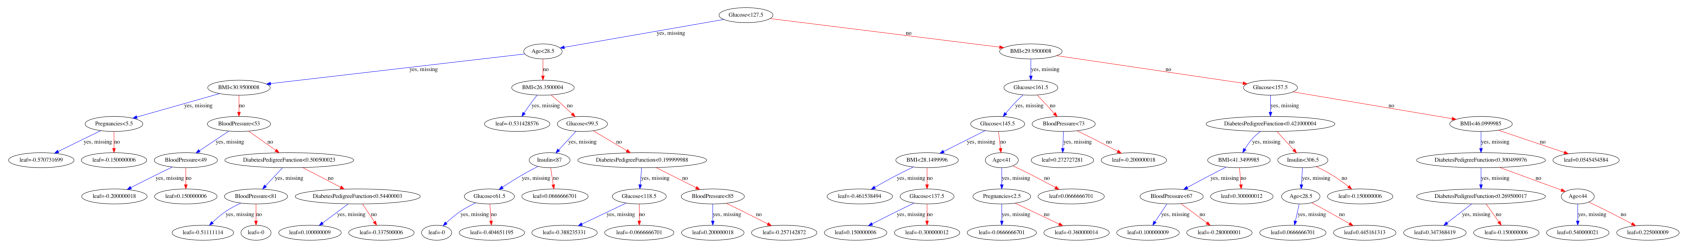

In [4]:
# 4.3  Graphviz 패키지를 이용해 모델의 의사 결정 나무를 시각화하는 코드

%matplotlib inline

import os
# set graphviz path
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# set up the parameters
rcParams['figure.figsize'] = 30,60
# show decision tree
plot_tree(model)
plt.show()


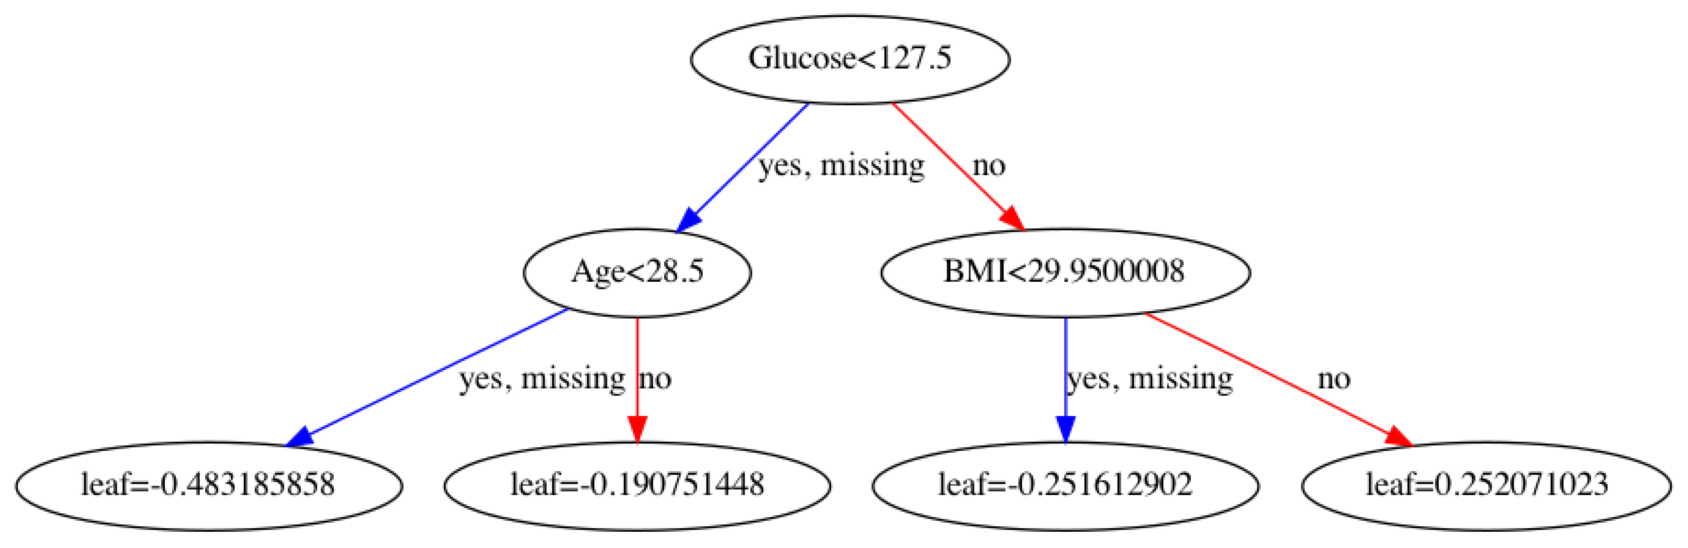

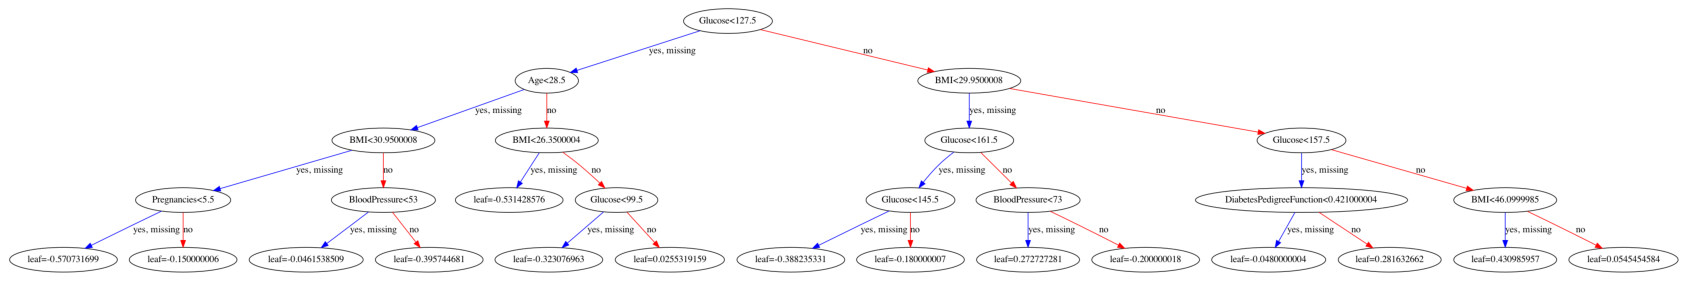

In [5]:
#  예제 4.7 XGBClassifier의 max_depth 옵션을 조절해 의사 결정 나무를 가지 치는 코드

model = XGBClassifier(max_depth=2)
model.fit(x_train, y_train)

plot_tree(model)
plt.show()

model = XGBClassifier(max_depth=4)
model.fit(x_train, y_train)

plot_tree(model)
plt.show()


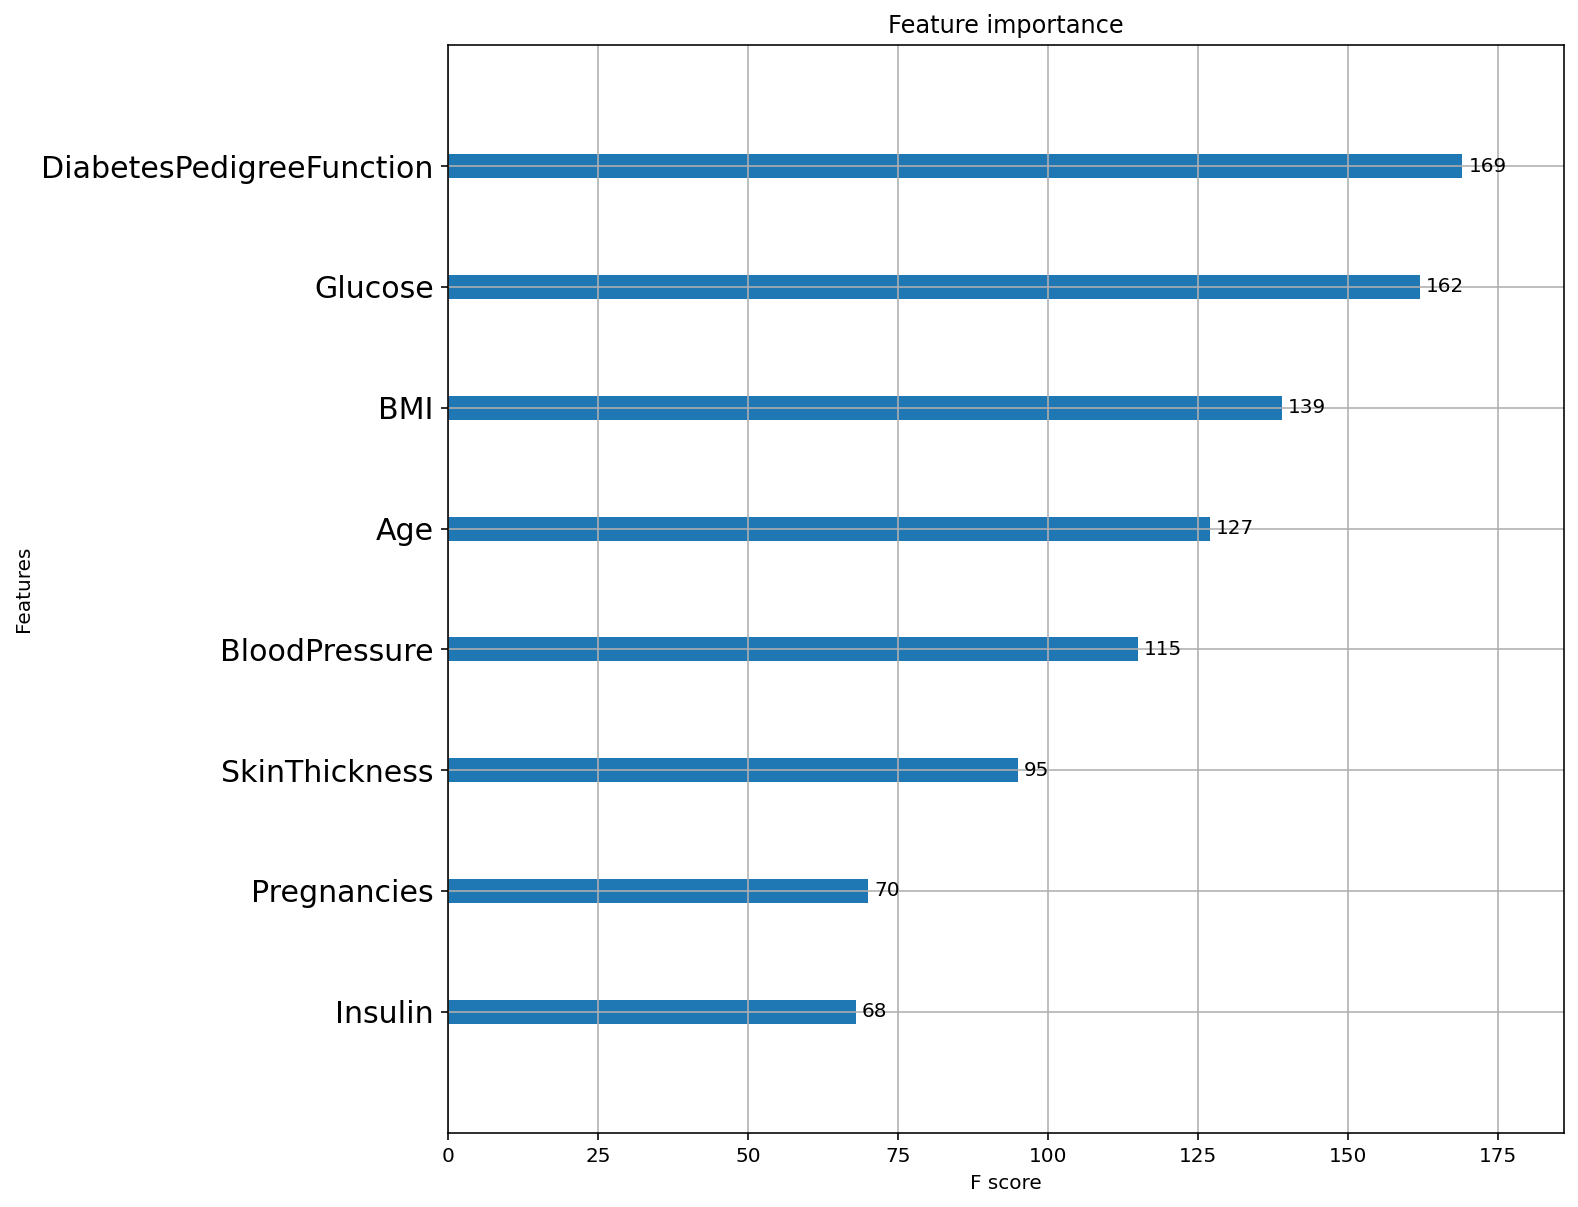

In [6]:
# 예제 4.8 당뇨병 진단 모델의 피처 중요도를 계산하고 시각화하는 코드
%config InlineBackend.figure_format = 'retina'
from xgboost import plot_importance
# figure size change
rcParams['figure.figsize'] = 10, 10
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()


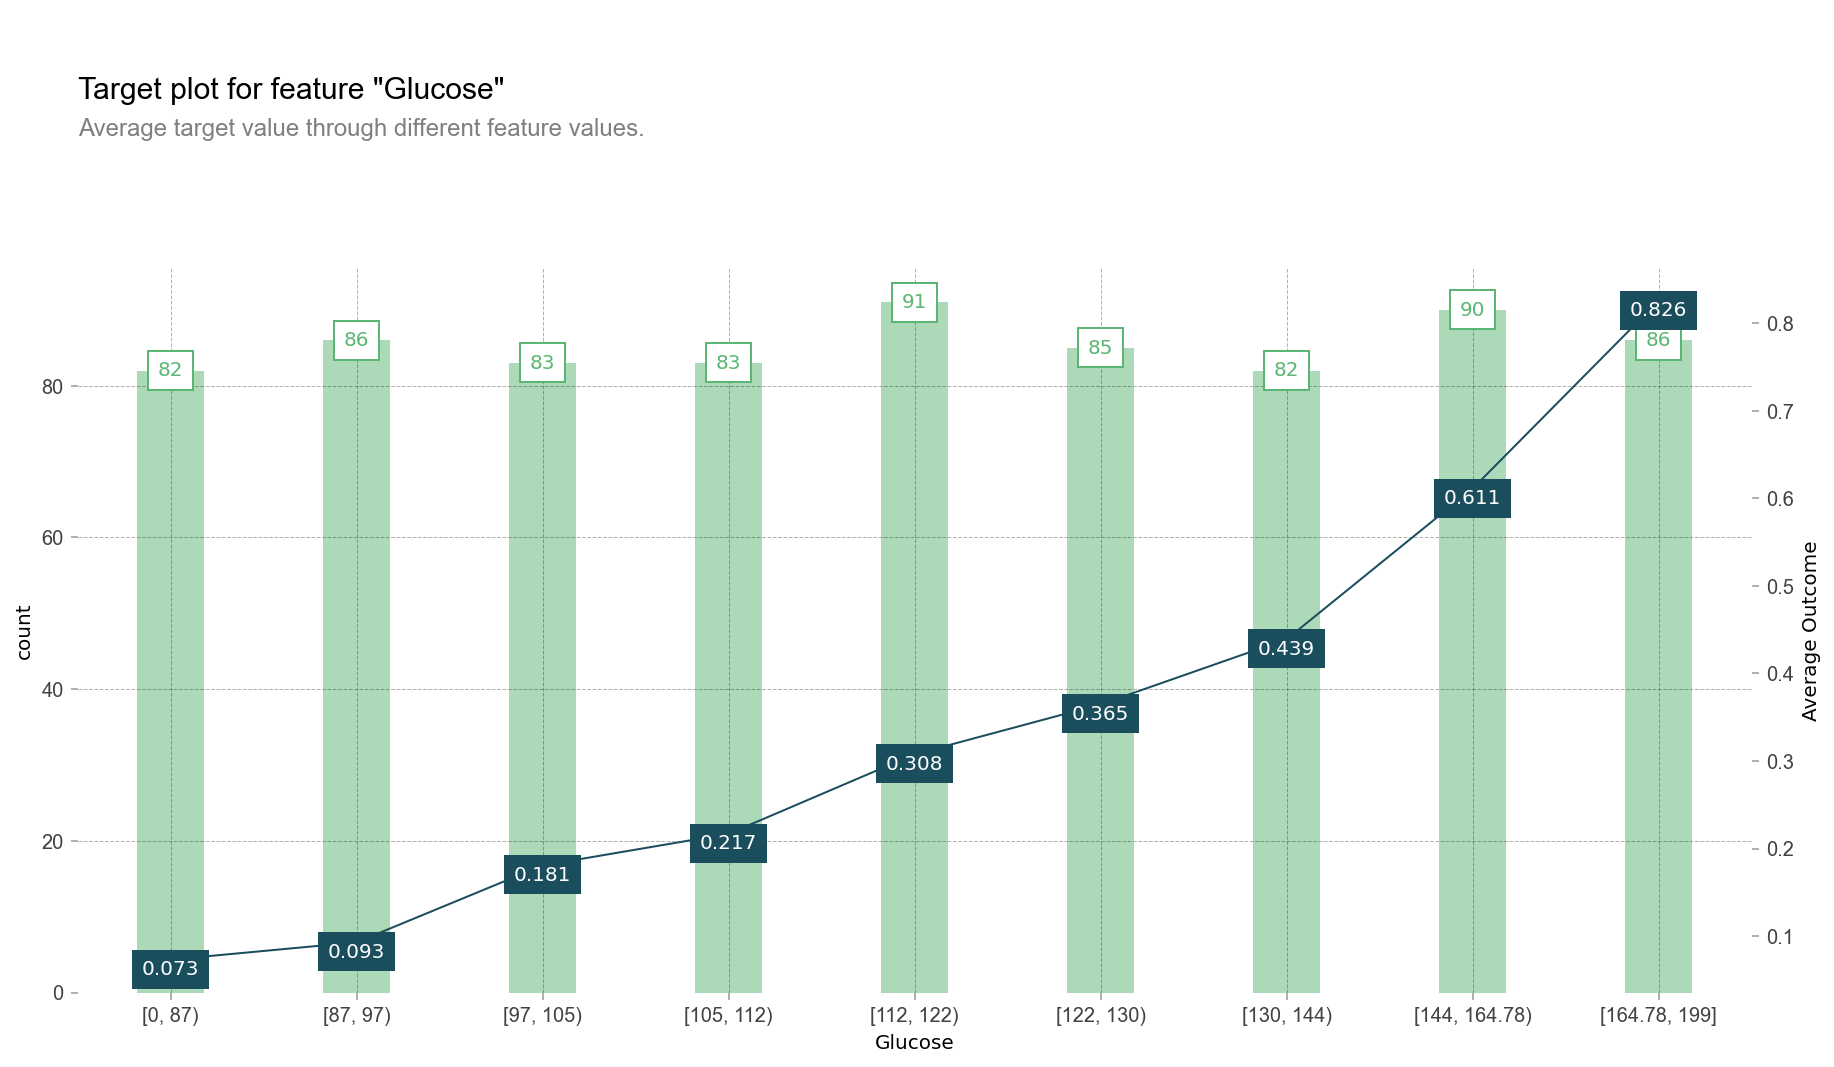

In [12]:
# 예제 4.9 pdpbox를 사용해 GTT 피처에 대한 목표 플롯(Target plots)을 그리는 코드
#!pip install pdpbox

from pdpbox import pdp, info_plots#, pdp_interact

# load data
dataset = pd.read_csv('pima_indian_diabetes/diabetes.csv', delimiter=",")


pima_data = dataset
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]
fig, axes, summary_df = info_plots.target_plot( 
    df=pima_data, 
    feature='Glucose', 
    feature_name='Glucose',
    target=pima_target )


In [13]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 87)",0.000000,87.000000,82,0.073171
1,1,"[87, 97)",87.000000,97.000000,86,0.093023
2,2,"[97, 105)",97.000000,105.000000,83,0.180723
3,3,"[105, 112)",105.000000,112.000000,83,0.216867
4,4,"[112, 122)",112.000000,122.000000,91,0.307692
5,5,"[122, 130)",122.000000,130.000000,85,0.364706
6,6,"[130, 144)",130.000000,144.000000,82,0.439024
7,7,"[144, 164.78)",144.000000,164.777778,90,0.611111
8,8,"[164.78, 199]",164.777778,199.000000,86,0.825581


In [14]:
pima_data[pima_features]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


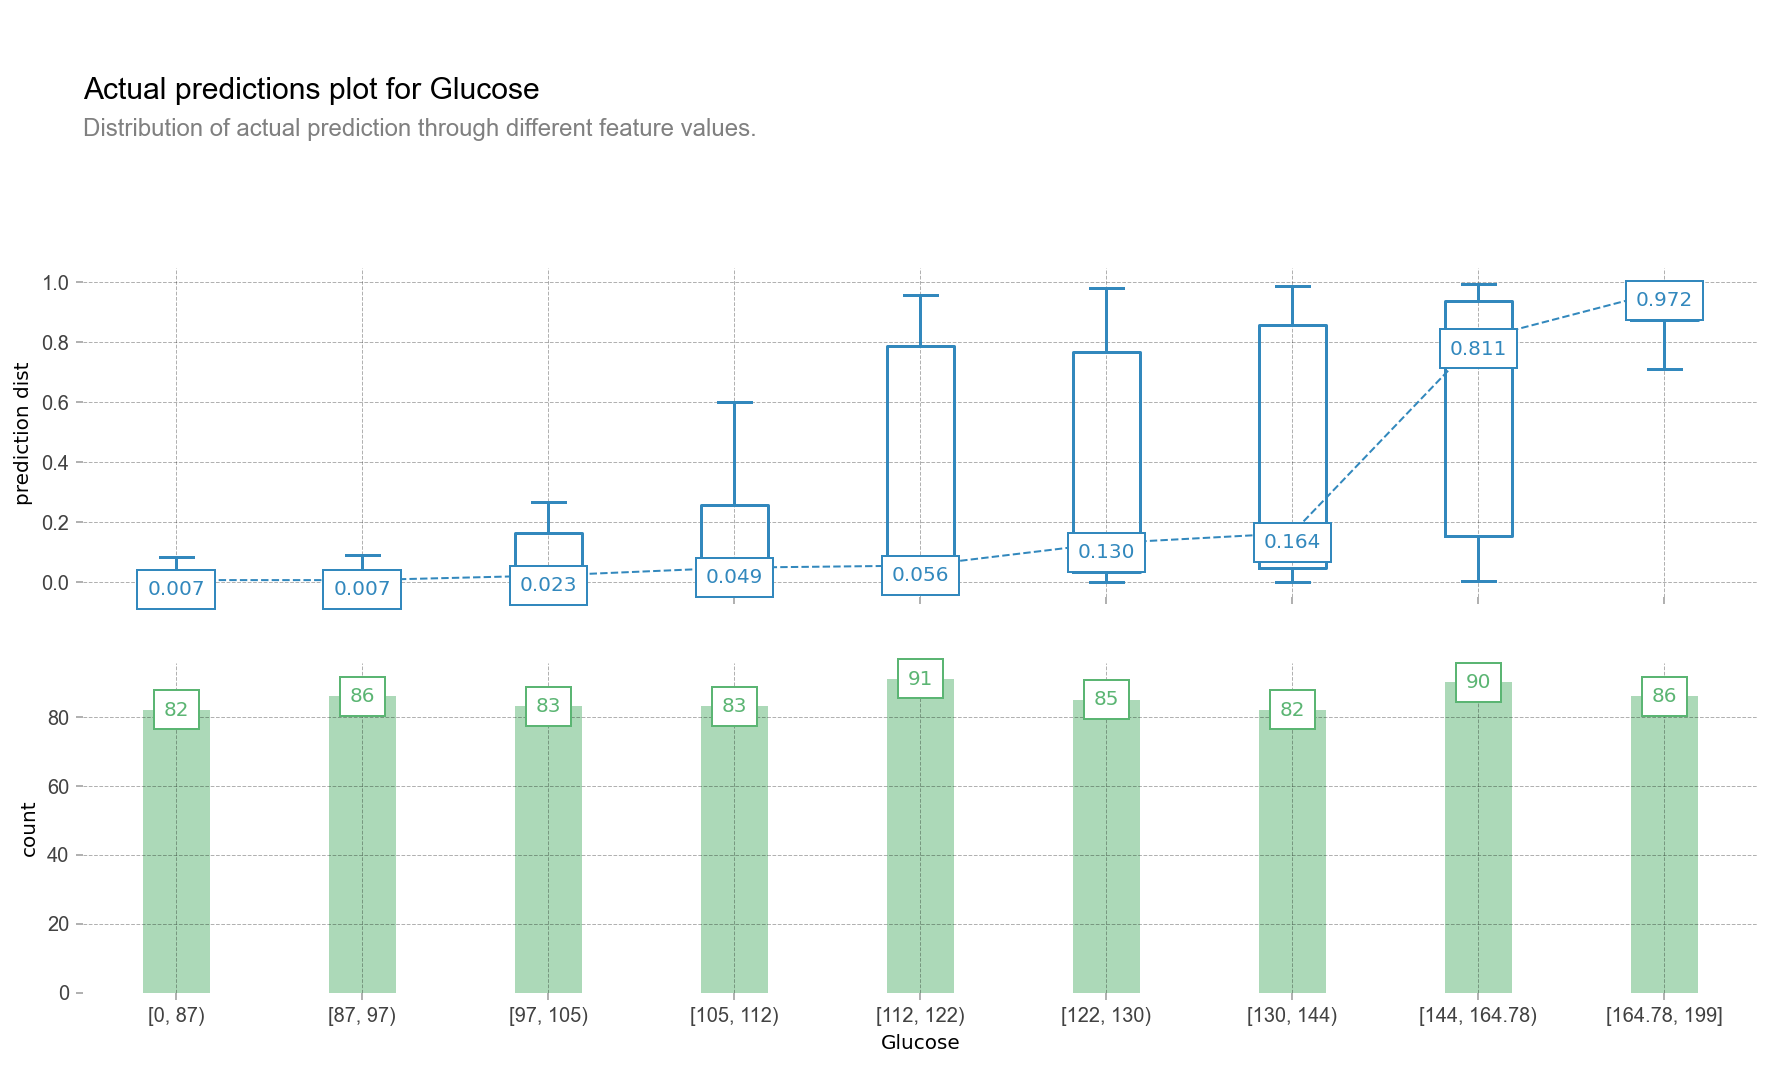

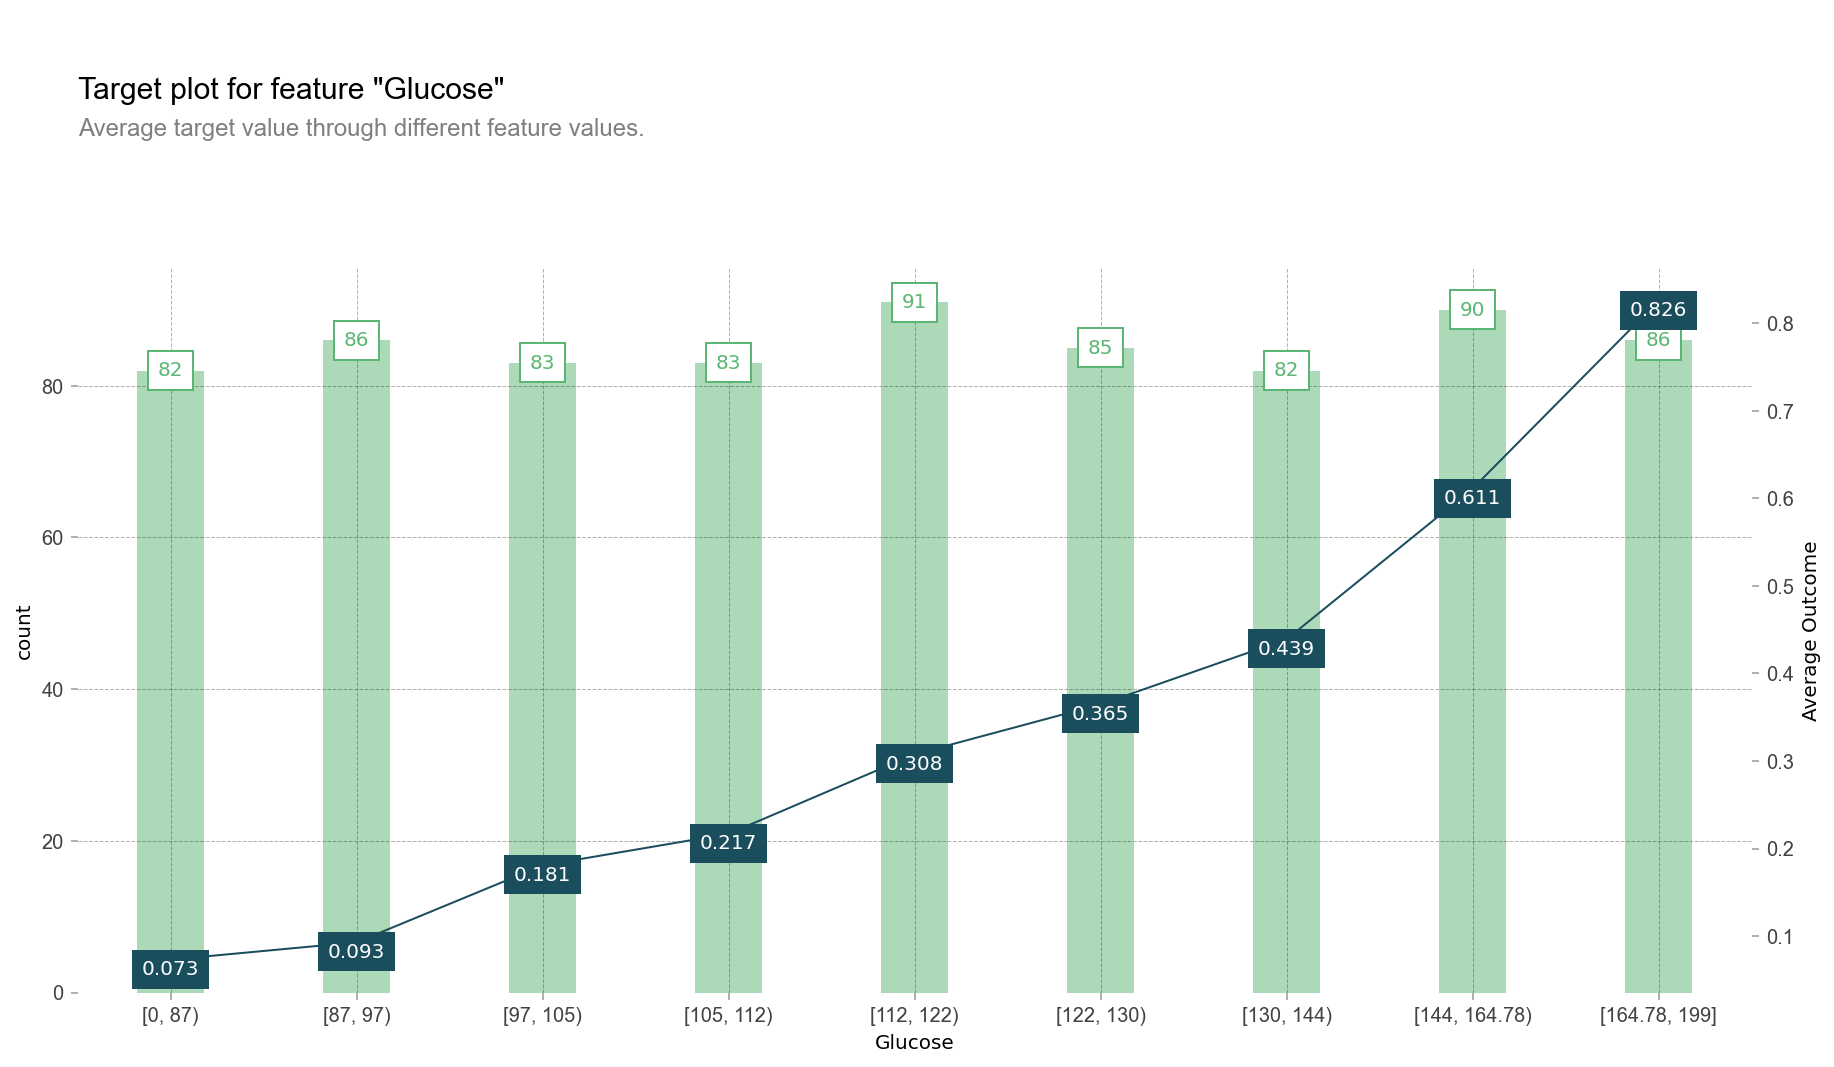

In [15]:
# 예제 4.10 GTT 데이터에 대한 모델의 실제 예측 분포 플롯을 그리는 코드

fig, axes, summary_df = info_plots.actual_plot(
    model=model,
    X=pima_data[pima_features],
    feature='Glucose',
    feature_name='Glucose',
    predict_kwds={}
)

fig, axes, summary_df = info_plots.target_plot(
    df=pima_data, feature='Glucose', feature_name='Glucose', target=pima_target
)

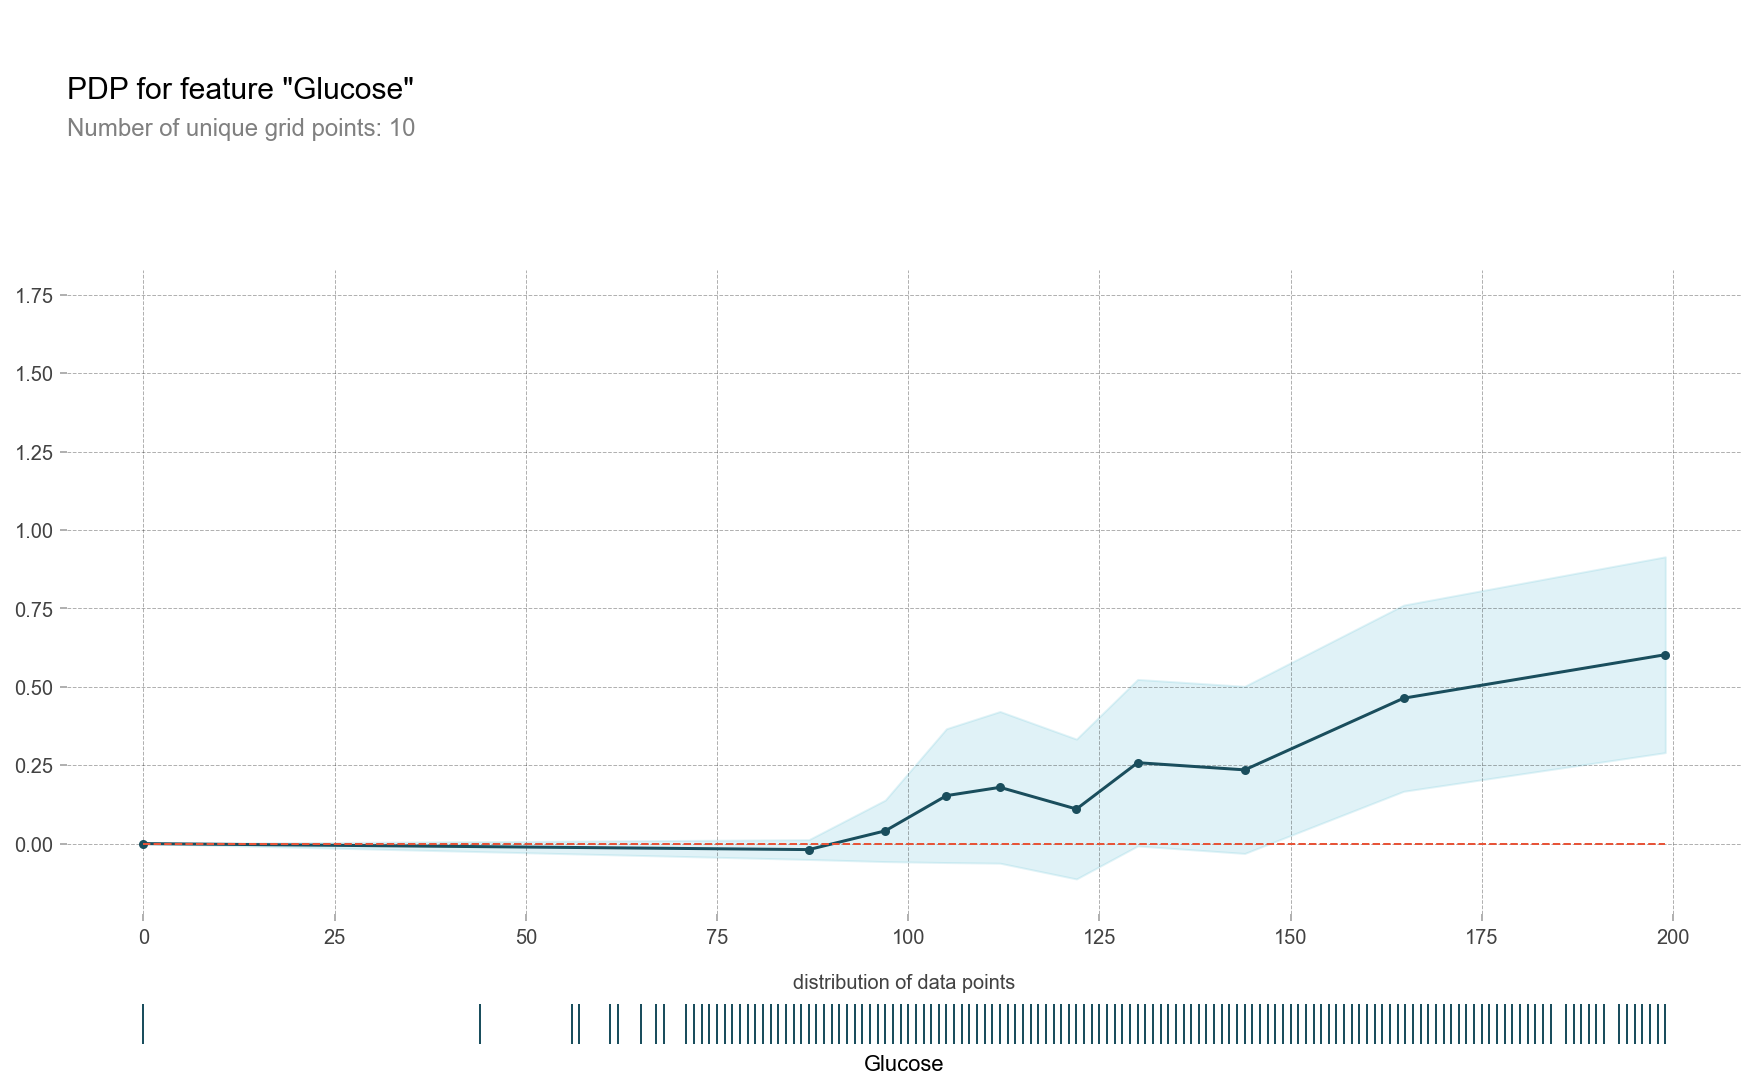

In [16]:
# 예제 4.11 GTT 테스트 피처에 대해 부분 의존성을 계산하고 플롯을 그리는 코드

# pdp isolation plot
pdp_gc = pdp.pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='Glucose'
)

# plot information
fig, axes = pdp.pdp_plot(
    pdp_gc,
    'Glucose',
    plot_lines=False,
    frac_to_plot=0.5,
    plot_pts_dist=True
)


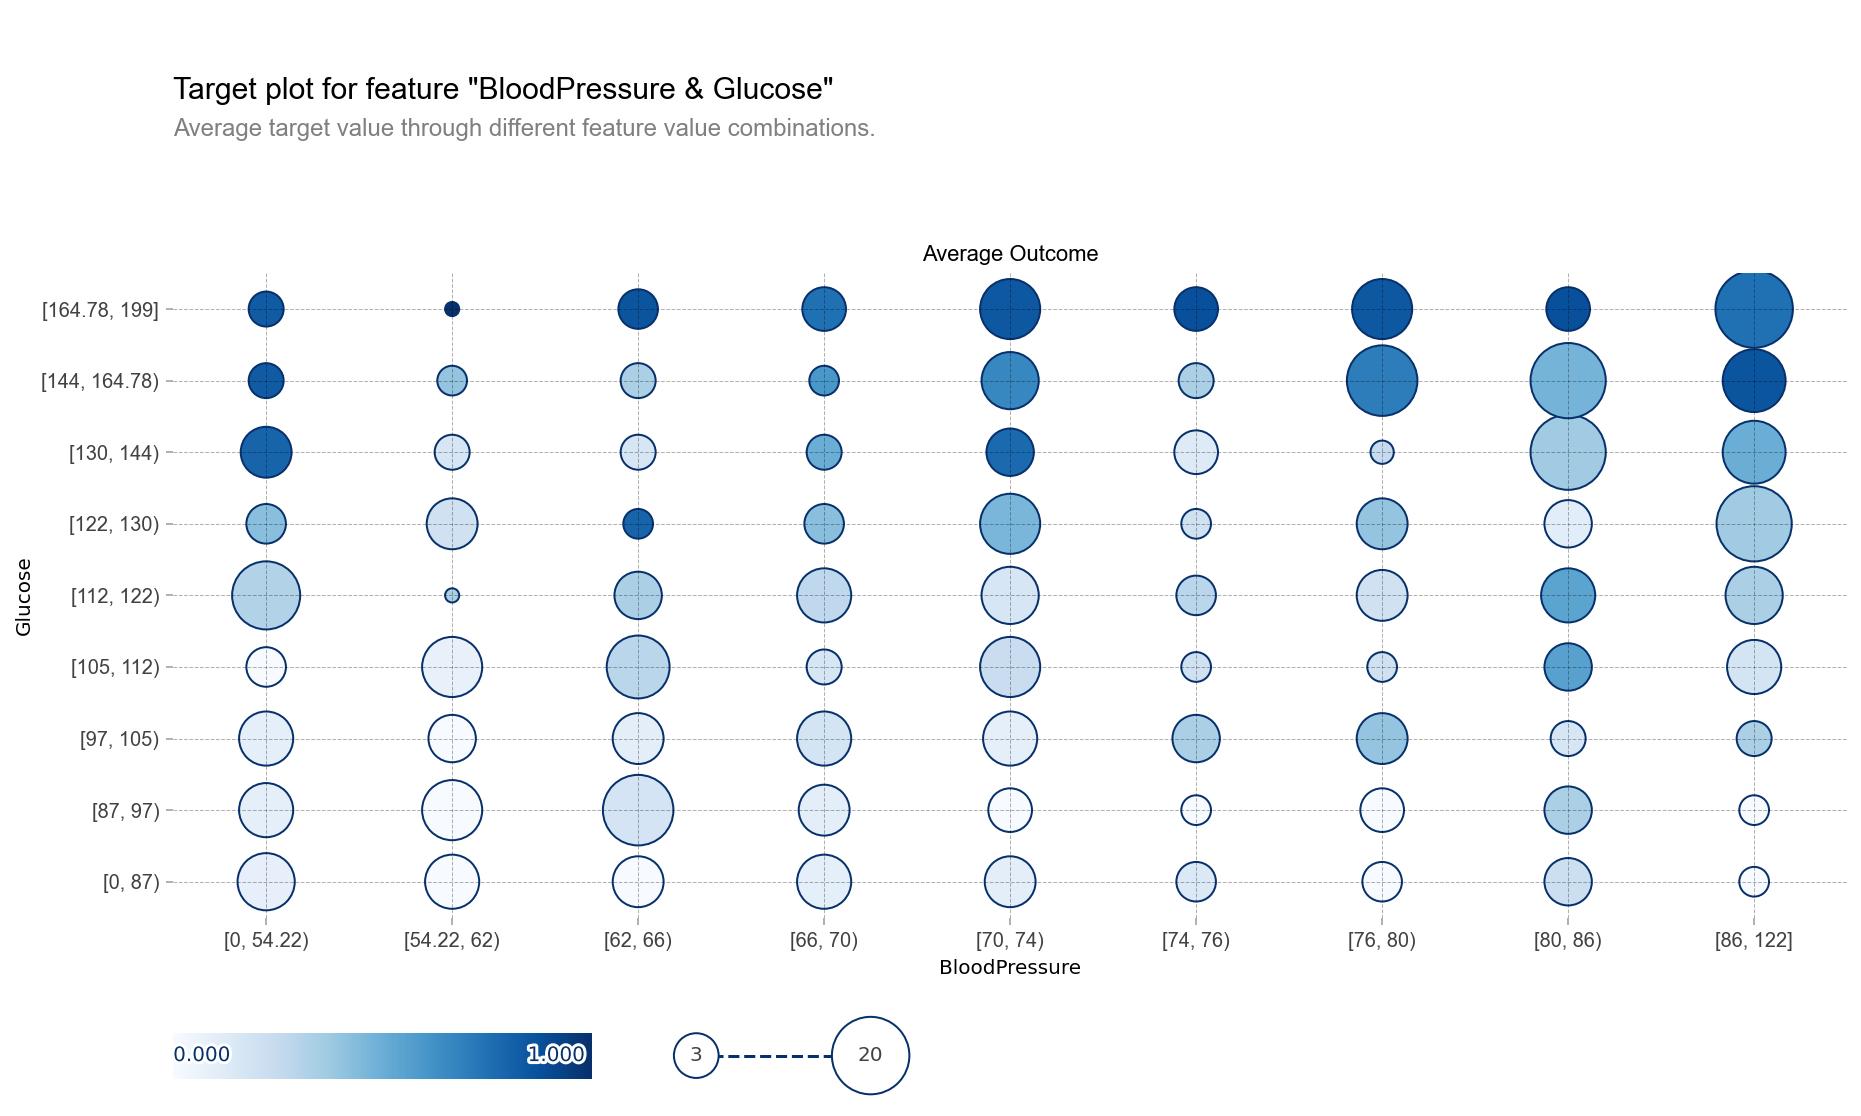

In [17]:
# 예제 4.12 혈압과 GTT 테스트 데이터 두 피처에 대해 목표 플롯을 그리는 코드
fig, axes, summary_df = info_plots.target_plot_interact(
    df=pima_data,
    features=['BloodPressure', 'Glucose'],
    feature_names=['BloodPressure', 'Glucose'],
    target=pima_target
)


TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

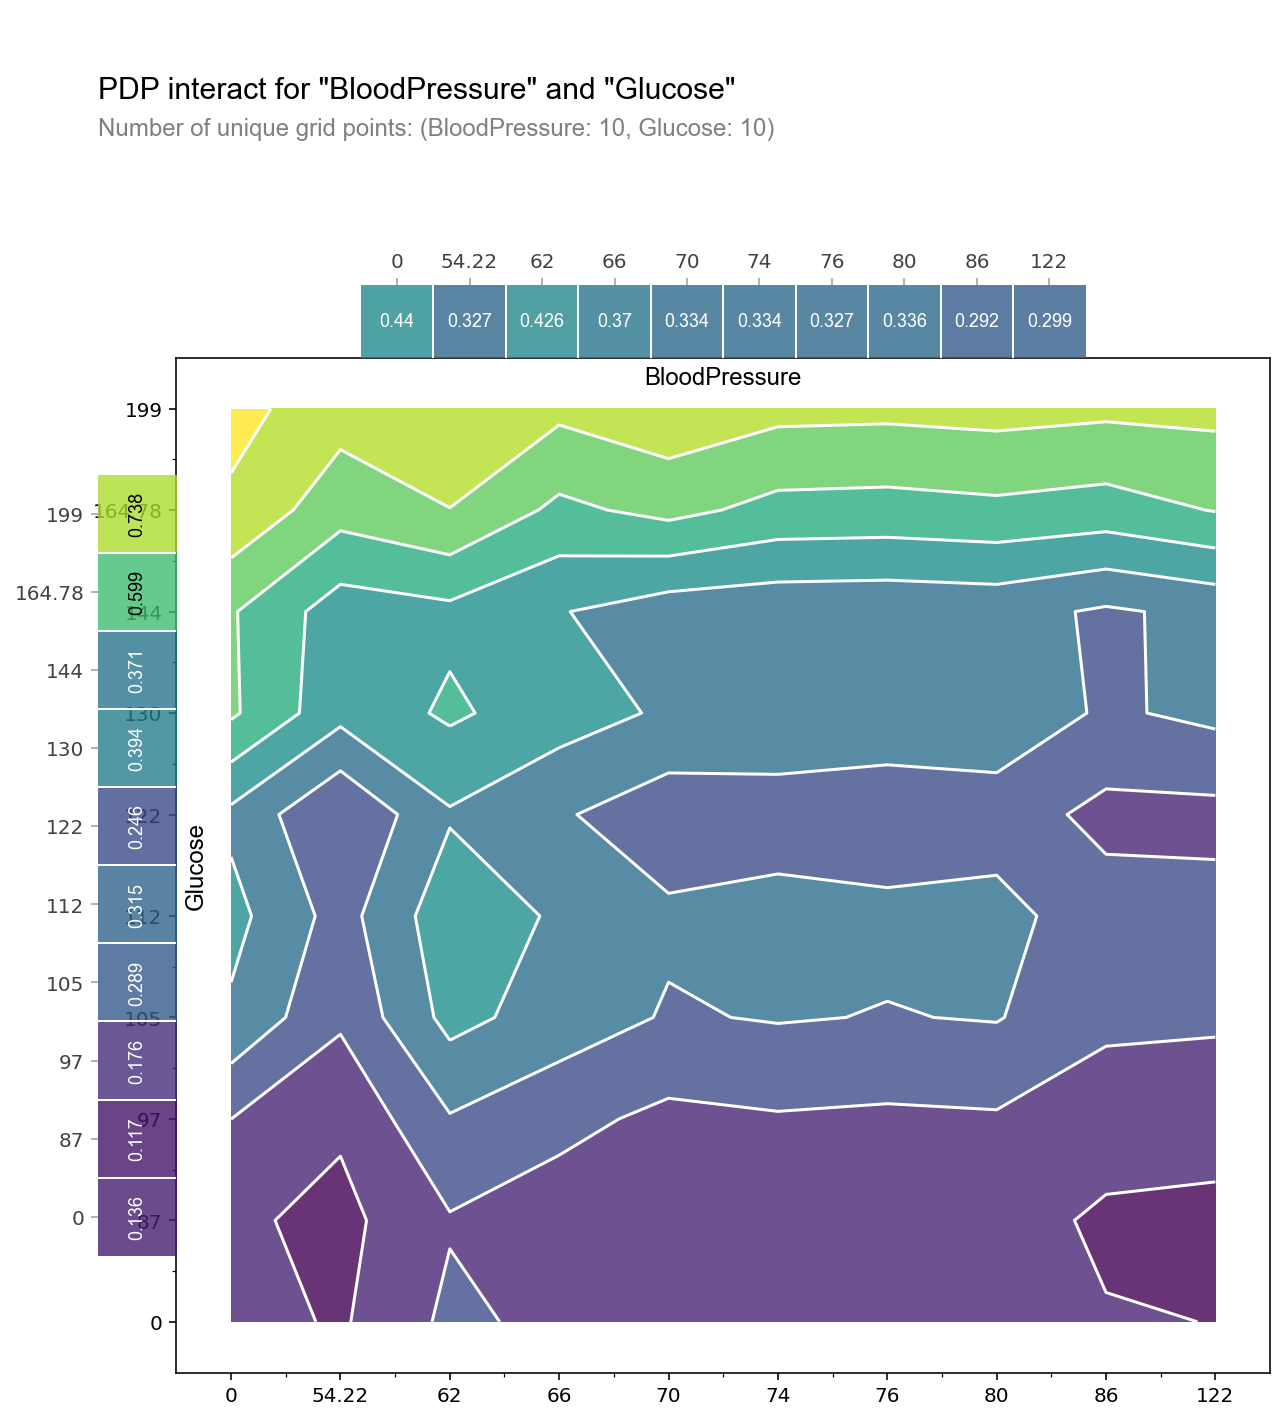

In [18]:
# 예제 4.13 혈압과 GTT 테스트 데이터로 모델에 대한 부분 의존성 플롯을 그리는 코드

pdp_interaction = pdp.pdp_interact(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    features=['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_interaction,
    feature_names=['BloodPressure', 'Glucose'],
    plot_type='contour',
    x_quantile=True,
    plot_pdp=True
)


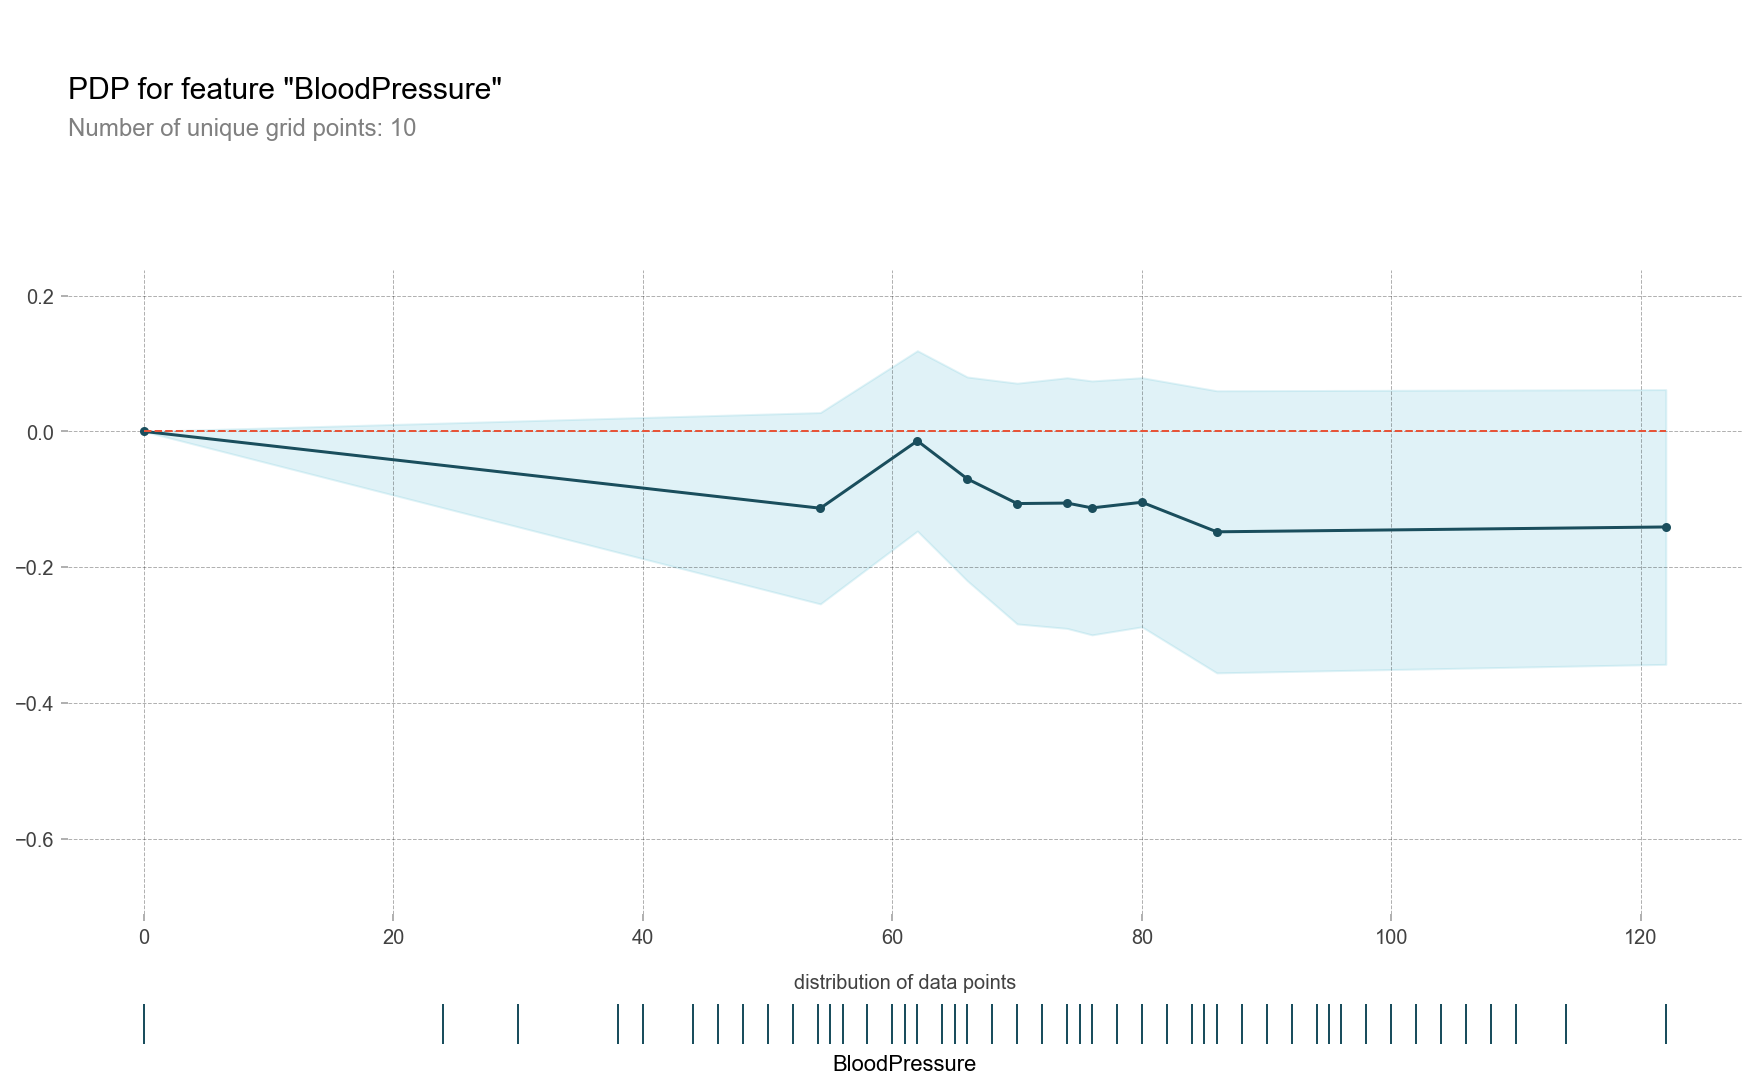

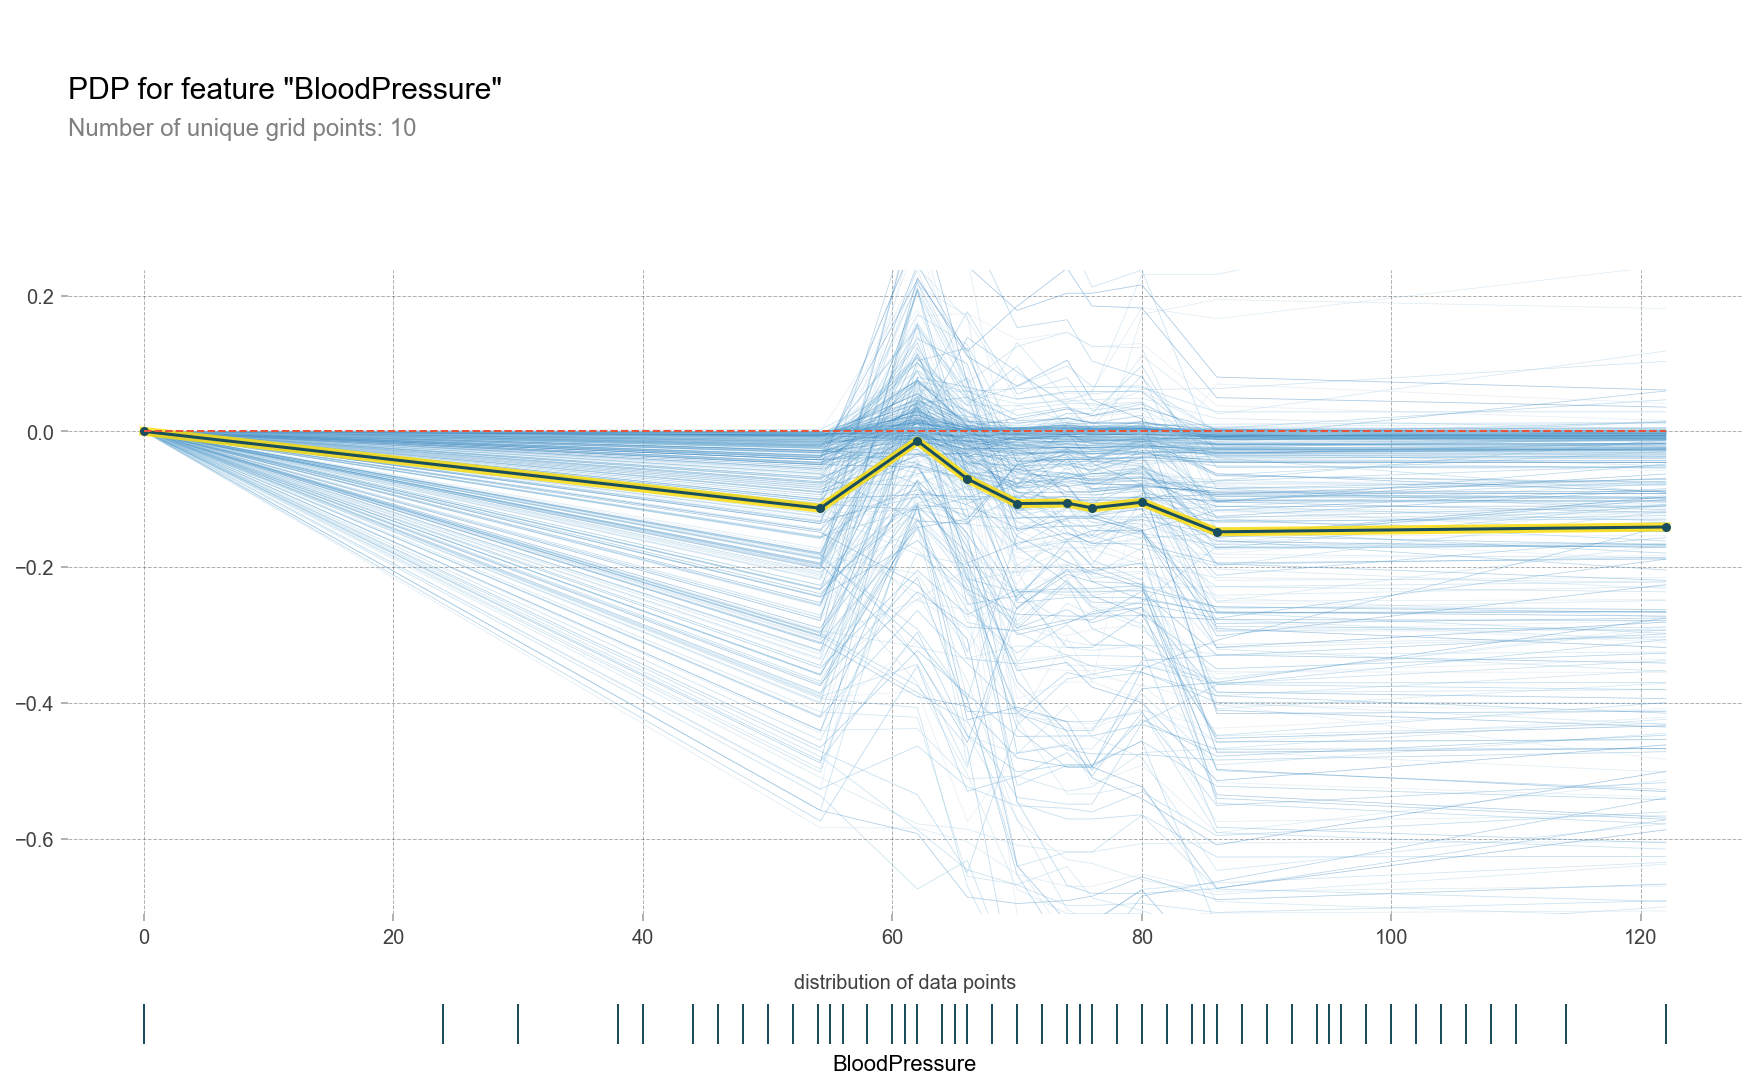

In [20]:
# 예제 4.14 혈압 피처에 대해 부분 의존성 플롯을 그리는 코드

# calculate model with BloodPressure to express pdp
pdp_bp = pdp.pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='BloodPressure'
)

# plot PDP on BloodPressure
fig, axes = pdp.pdp_plot(
    pdp_bp,
    'BloodPressure',
    plot_lines=False,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

# plot PDP on BloodPressure
fig, axes = pdp.pdp_plot(
    pdp_bp,
    'BloodPressure',
    plot_lines=True,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

In [21]:
# 예제 4.15 GridSearchCV를 통해 당뇨병 진단 모델의 최적 하이퍼파라미터를 찾는 코드
import numpy as np
from sklearn.model_selection import GridSearchCV

cv_params = {
    'max_depth': np.arange(1, 6, 1),
}
fix_params = {
    'booster': 'gbtree', 'objective': 'binary:logistic',
}

csv = GridSearchCV(
    XGBClassifier(**fix_params),
    cv_params,
    scoring = 'precision',
    cv = 5,
    n_jobs=5
)

csv.fit(x_train, y_train)
print(csv.best_params_)

# make predictions for test data
y_pred = csv.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


{'max_depth': 1}
Accuracy: 82.47%


In [22]:
# 예제 4.17 GridSearchCV를 사용해 max_depth, learning_rate, n_estimators 파라미터값 변화에 대한 최적의 모델을 찾는 코드

import numpy as np
from sklearn.model_selection import GridSearchCV
cv_params = {
    'max_depth': np.arange(1, 6, 1),
    'learning_rate': np.arange(0.05, 0.6, 0.05),
    'n_estimators': np.arange(50, 300, 50),
}
fix_params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
}
csv = GridSearchCV(
    XGBClassifier( **fix_params),
    cv_params,
    scoring = 'precision',
    cv = 5,
    n_jobs=5
)
csv.fit(x_train, y_train)
# show best parameter score
print(csv.best_params_)
# make predictions for test data

y_pred = csv.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# show every combination parameter in Grid Search

for parameter in csv.cv_results_["params"]:
    print(parameter)


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
Accuracy: 75.97%
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 50}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 150}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 250}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 250}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}
{'learning_r

In [23]:
# 예제 4.19 GridSearchCV로 찾아낸 당뇨병 진단 모델의 최적 파라미터

model = XGBClassifier(
    booster = 'gbtree',
    objective = 'binary:logistic',
    learning_rate = 0.03,
    n_estimators =  150,
    reg_alpha = 0.15,
    reg_lambda = 0.7,
    max_depth = 4
)

In [24]:
# 예제 4.20 sklearn 패키지로 컨퓨전 행렬을 계산하는 코드

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[89  8]
 [29 28]]


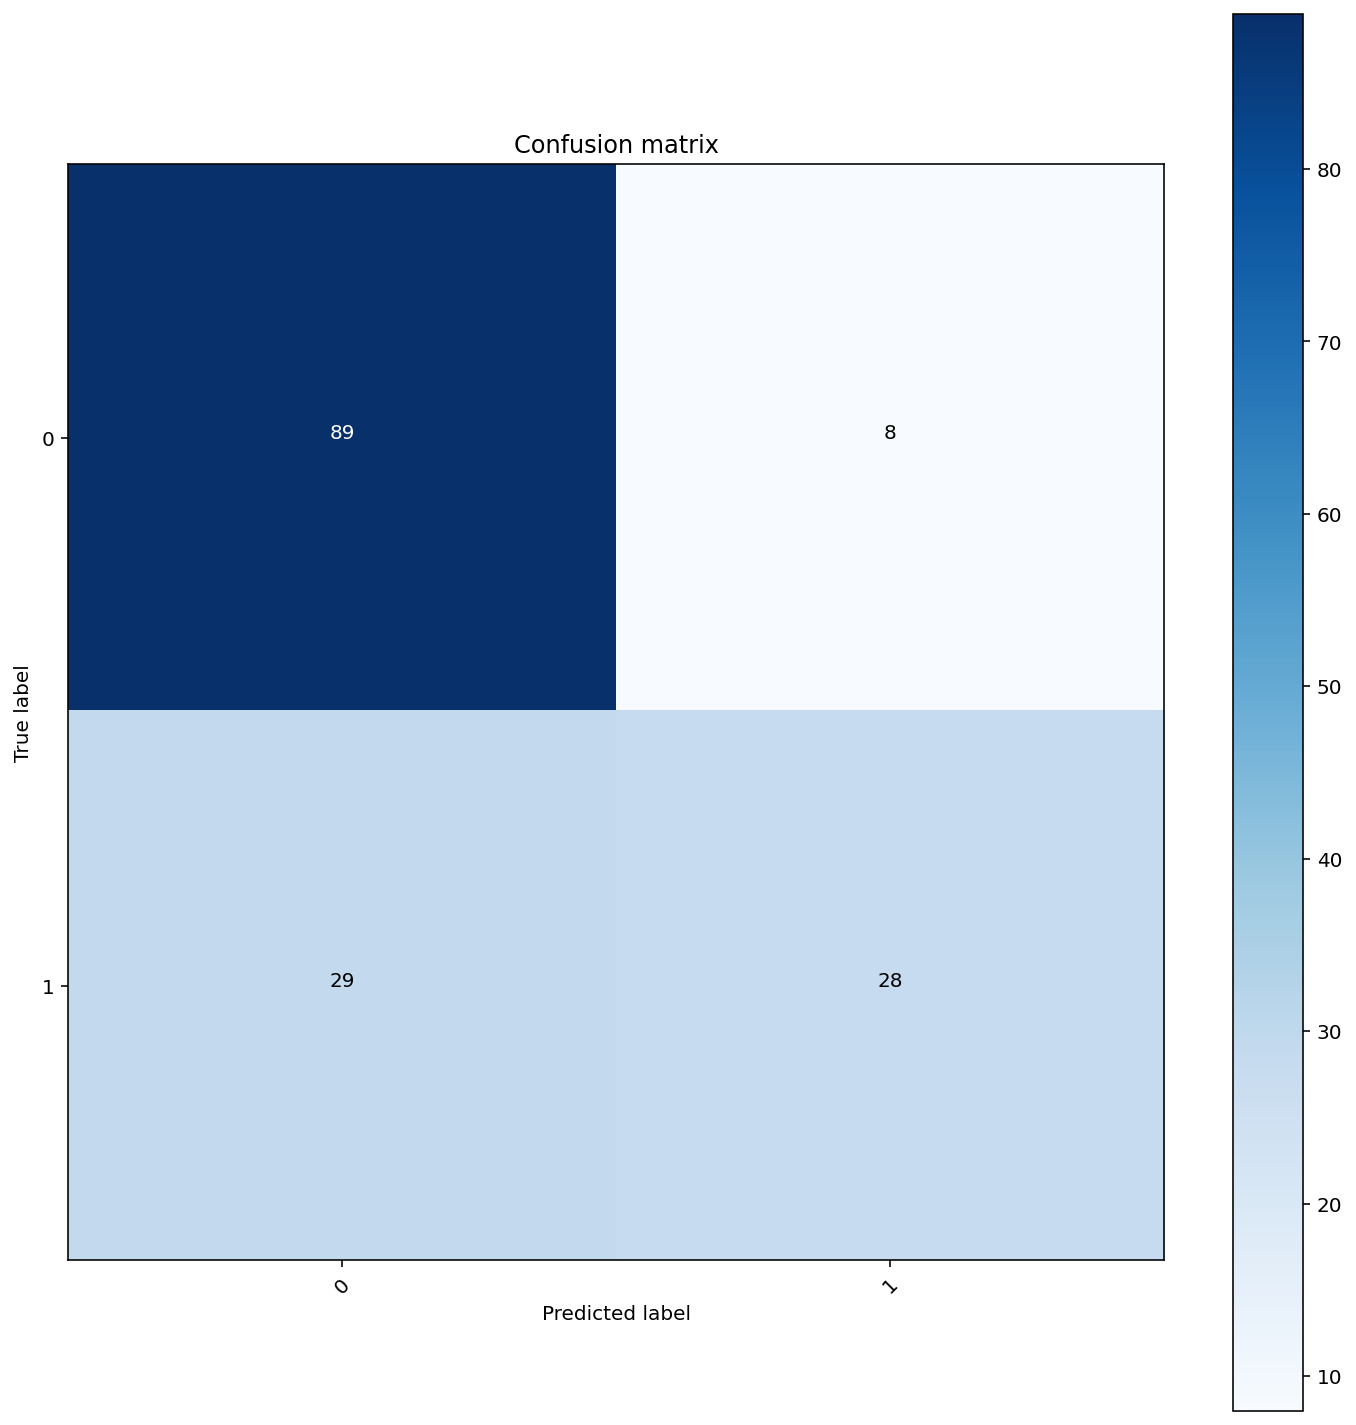

Precision = 0.778
Recall (TPR) = 0.491
Fallout (FPR) = 8.247e-02


(0.7777777777777778, 0.49122807017543857, 0.08247422680412371)

In [25]:
# 예제 4.22 sklearn 패키지로 계산한 컨퓨전 행렬을 matplotlib을 통해 시각화하는 코드

import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision = {:.3f}'.format(tp/(tp+fp)))
    print('Recall (TPR) = {:.3f}'.format(tp/(tp+fn)))
    print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))

    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

plot_confusion_matrix(cm, ['0', '1'], )
show_data(cm, print_res=1)
